In [27]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

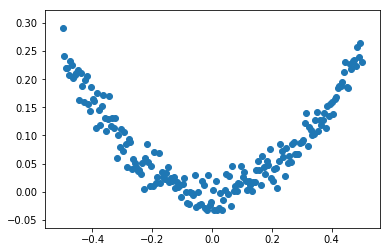

In [28]:
# 使用numpy生成200个均匀分布的点，并新增一个维度
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
# 生成一些跟x_data相同shape的随机值作为噪声数据
noise = np.random.normal(0,0.02,x_data.shape)
# 构建目标值，符合非线性函数，另外再加上噪声值
y_data = np.square(x_data) + noise
# 画散点图
plt.scatter(x_data,y_data)
plt.show()

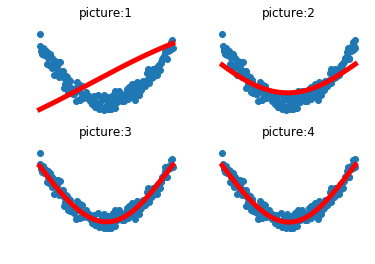

In [29]:
# 构建一个顺序模型
# 顺序模型为keras中的基本模型结构，就像汉堡一样一层一层叠加网络
model = tf.keras.Sequential()
# 因为要做非线性回归，所以需要一个带有隐藏层的神经网络
# 并且需要使用非线性的激活函数，比如tanh函数
# keras中input_dim只需要在输入层设置，后面的网络可以自动推断出该层对应的输入
# keras中定义网络结构已经默认设置好权值初始化，所以我们不需要额外进行设置
model.add(tf.keras.layers.Dense(units=10,input_dim=1,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1,activation='tanh'))
# 设置模型的优化器和代价函数，学习率为0.1
# sgd:Stochastic gradient descent，随机梯度下降法
# mse:Mean Squared Error，均方误差
model.compile(optimizer=SGD(0.3),loss='mse')

# 训练3001个批次
for step in range(3001):
    # 训练一个批次数据，返回cost值
    cost = model.train_on_batch(x_data,y_data)
    # 每1000个batch打印一次cost值
    if step % 1000 == 0:
        # 定义一个2*2的图，当前是第i/1000+1个图
        plt.subplot(2,2,step/1000+1)
        # 把x_data喂到模型中获得预测值
        prediction_value = model.predict(x_data)
        # 画散点图
        plt.scatter(x_data,y_data)
        # 画模型预测曲线图
        plt.plot(x_data,prediction_value,'r-',lw=5)
        # 不显示坐标
        plt.axis('off')
        # 图片的标题设置
        plt.title("picture:" + str(int(step/1000+1)))
plt.show()